WEEK 1 PROJECT (AQI PREDICTION)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv("/content/sample_data/AQI_Data.csv")

In [ ]:
data.shape

(1093, 9)

In [ ]:
data.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


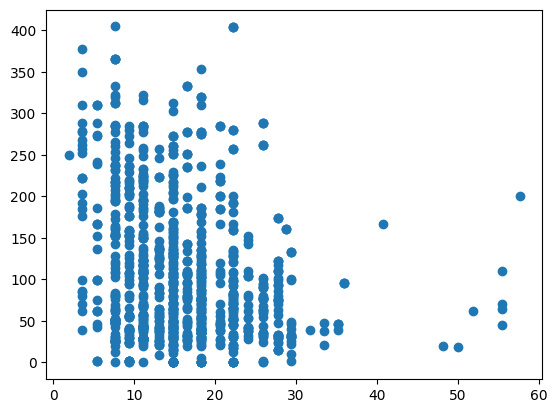

In [ ]:
plt.scatter(data['VM'],data['PM 2.5'])

to check if there is a null data


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093 entries, 0 to 1092
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       1093 non-null   float64
 1   TM      1093 non-null   float64
 2   Tm      1093 non-null   float64
 3   SLP     1093 non-null   float64
 4   H       1093 non-null   float64
 5   VV      1093 non-null   float64
 6   V       1093 non-null   float64
 7   VM      1093 non-null   float64
 8   PM 2.5  1092 non-null   float64
dtypes: float64(9)
memory usage: 77.0 KB


In [ ]:
data.isnull().sum()

,0
T,0
TM,0
Tm,0
SLP,0
H,0
VV,0
V,0
VM,0
PM 2.5,1


to fill the missing data with mean value

In [ ]:
data['PM 2.5'].fillna(data['PM 2.5'].mean(), inplace=True)

<ipython-input-32-c7914ef70660>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['PM 2.5'].fillna(data['PM 2.5'].mean(), inplace=True)


checking again if the missing data is filled ot not

In [ ]:
data.isnull().sum()

,0
T,0
TM,0
Tm,0
SLP,0
H,0
VV,0
V,0
VM,0
PM 2.5,0


making correlation matrix to check the relation of each column with PM 2.5

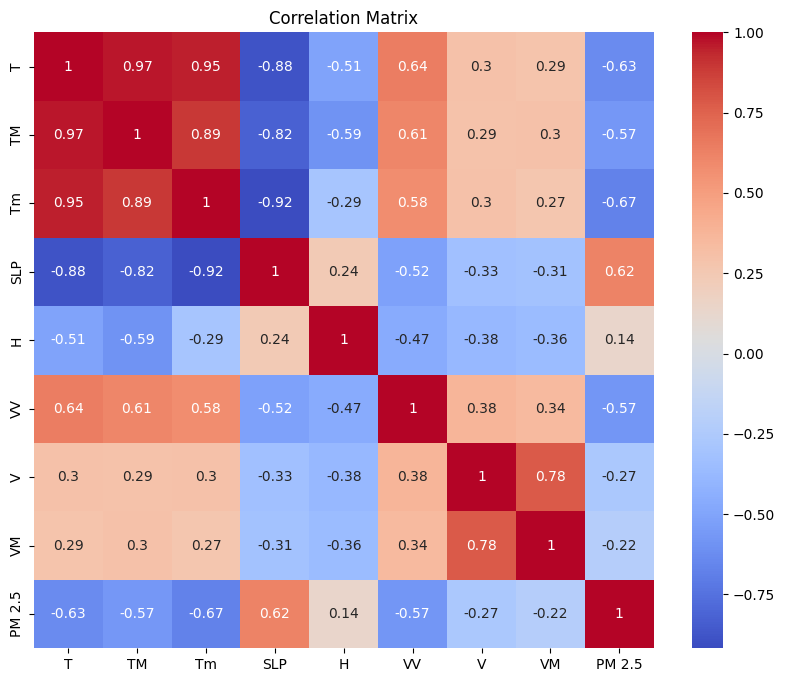

In [ ]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
pm25_correlations = correlation_matrix['PM 2.5'].sort_values(ascending=False)
print("\nPM 2.5 Correlations:")
print(pm25_correlations)


PM 2.5 Correlations:
PM 2.5    1.000000
SLP       0.622410
H         0.137802
VM       -0.215813
V        -0.268498
TM       -0.567378
VV       -0.573864
T        -0.630705
Tm       -0.673415
Name: PM 2.5, dtype: float64


Assuming Tm and T have most corelation with the PM 2.5 based on the correaltion matrix

In [ ]:
X = data[['Tm', 'T']]
y = data['PM 2.5']

Spliting data into training and testing sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Training the Linear regression model

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

making predictions

In [ ]:
y_pred = model.predict(X_test)

Evaluating Model


In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 3904.127106452108
R-squared: 0.4364252131734765


Scatter Plot

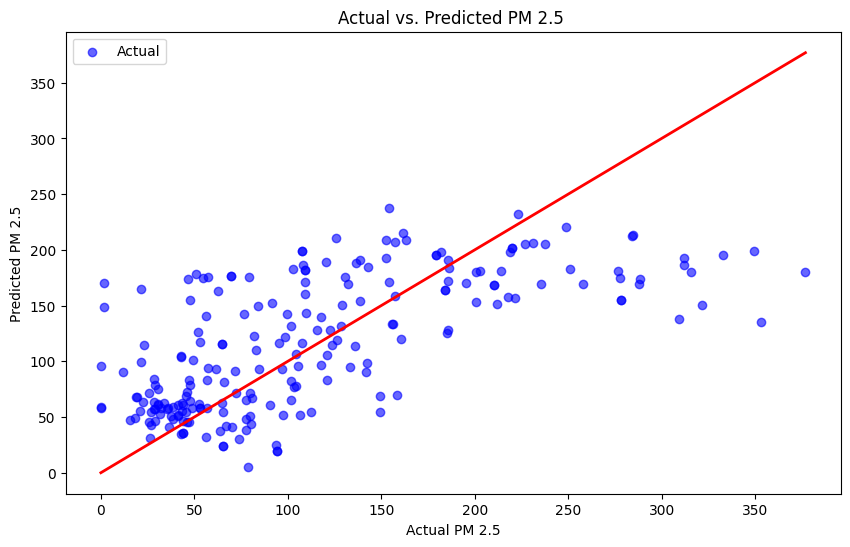

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual', alpha=0.6)
x_range = np.linspace(min(y_test), max(y_test), 100)
plt.plot(x_range, x_range, color='red', linewidth=2)
plt.xlabel("Actual PM 2.5")
plt.ylabel("Predicted PM 2.5")
plt.title("Actual vs. Predicted PM 2.5 ")
plt.legend()
plt.show()